# Problem 1: Clustering

<b>A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.
1.1 Read the data and do exploratory data analysis. Describe the data briefly.

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Dataset for Problem 1: bank_marketing_part1_Data.csv

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)
    
advance_payments: Amount paid by the customer in advance by cash (in 100s)
    
probability_of_full_payment: Probability of payment done in full by the customer to the bank
    
current_balance: Balance amount left in the account to make purchases (in 1000s)
    
credit_limit: Limit of the amount in credit card (10000s)
    
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
    
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

<b> Importing Libraries

In [245]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read the data and do exploratory data analysis. Describe the data briefly.

### Read The Dataset

In [246]:
df=pd.read_csv('bank_marketing_part1_Data.csv') 

In [247]:
df.head(10)

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   
5     12.70             13.41                       0.8874            5.183   
6     12.02             13.33                       0.8503            5.350   
7     13.74             14.05                       0.8744            5.482   
8     18.17             16.26                       0.8637            6.271   
9     11.23             12.88                       0.8511            5.140   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837  
5         3.091            8.456                         5.000  
6         2.810            4.271                         5.308  
7         3.114            2.932                         4.825  
8         3.512            2.853                         6.273  
9         2.795            4.325                         5.003

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Checking for Duplicates

In [249]:
dupes =df.duplicated()
dupes.sum()

0

### Check for Null Values

In [250]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [251]:
df.describe()

spending  advance_payments  probability_of_full_payment  \
count  210.000000        210.000000                   210.000000   
mean    14.847524         14.559286                     0.870999   
std      2.909699          1.305959                     0.023629   
min     10.590000         12.410000                     0.808100   
25%     12.270000         13.450000                     0.856900   
50%     14.355000         14.320000                     0.873450   
75%     17.305000         15.715000                     0.887775   
max     21.180000         17.250000                     0.918300   

       current_balance  credit_limit  min_payment_amt  \
count       210.000000    210.000000       210.000000   
mean          5.628533      3.258605         3.700201   
std           0.443063      0.377714         1.503557   
min           4.899000      2.630000         0.765100   
25%           5.262250      2.944000         2.561500   
50%           5.523500      3.237000         3.599000   
75%           5.979750      3.561750         4.768750   
max           6.675000      4.033000         8.456000   

       max_spent_in_single_shopping  
count                    210.000000  
mean                       5.408071  
std                        0.491480  
min                        4.519000  
25%                        5.045000  
50%                        5.223000  
75%                        5.877000  
max                        6.550000

In [252]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

### EDA

#### Plotting Distribution ,Histogram and boxplot to check Ouliers

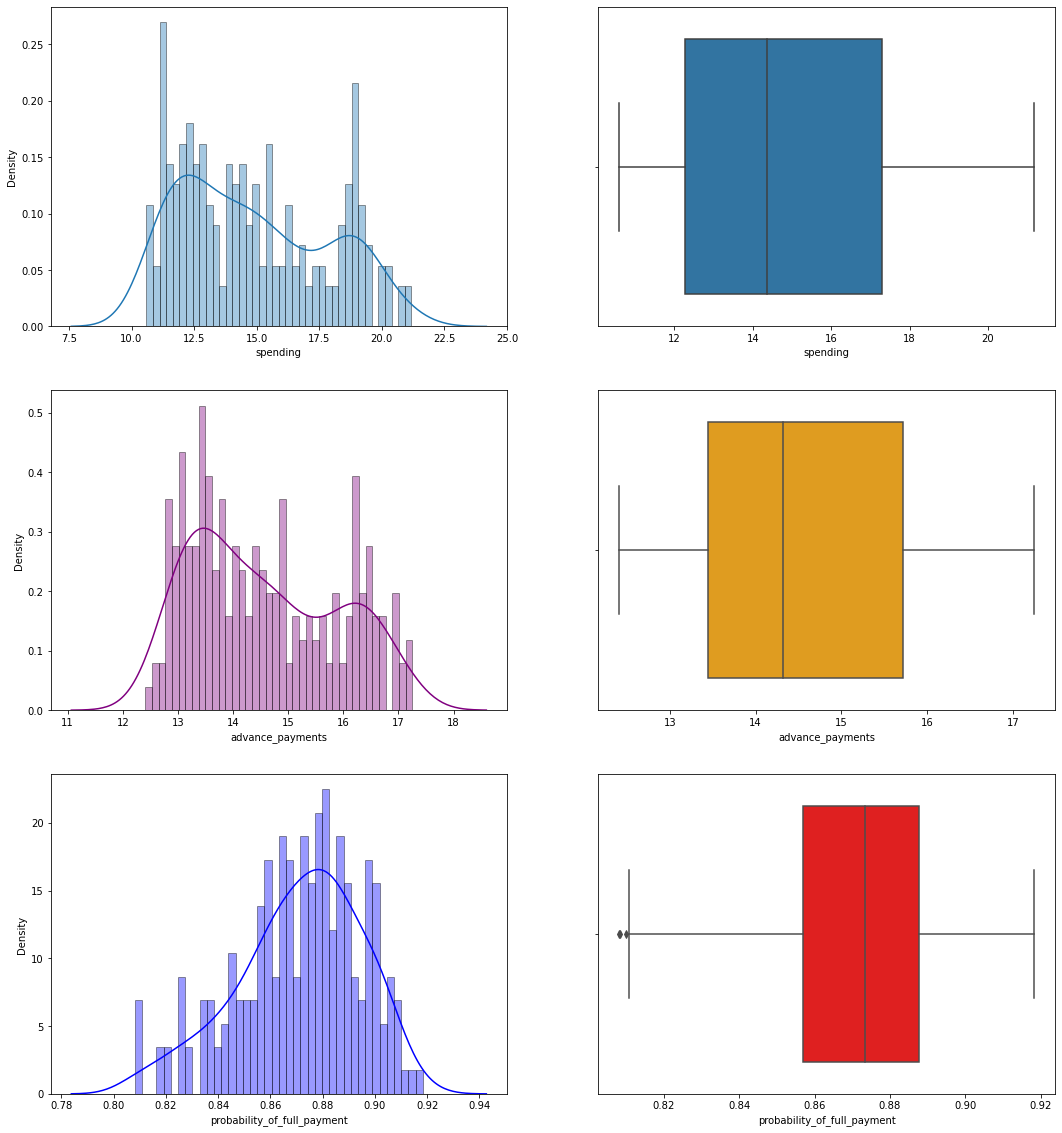

In [253]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (18,20))
sns.distplot(df['spending'], bins = 40, hist_kws= dict(ec = 'black'), ax = axs[0][0]);
sns.distplot(df['advance_payments'], bins = 40, hist_kws= dict(ec = 'black'), ax = axs[1][0], color= 'purple');
sns.distplot(df['probability_of_full_payment'], bins = 40, hist_kws= dict(ec ='black'), ax = axs[2][0], color= 'blue');


sns.boxplot(df['spending'], ax = axs[0][1]);
sns.boxplot(df['advance_payments'], ax = axs[1][1], color= 'orange');
sns.boxplot(df['probability_of_full_payment'], ax = axs[2][1], color= 'red');


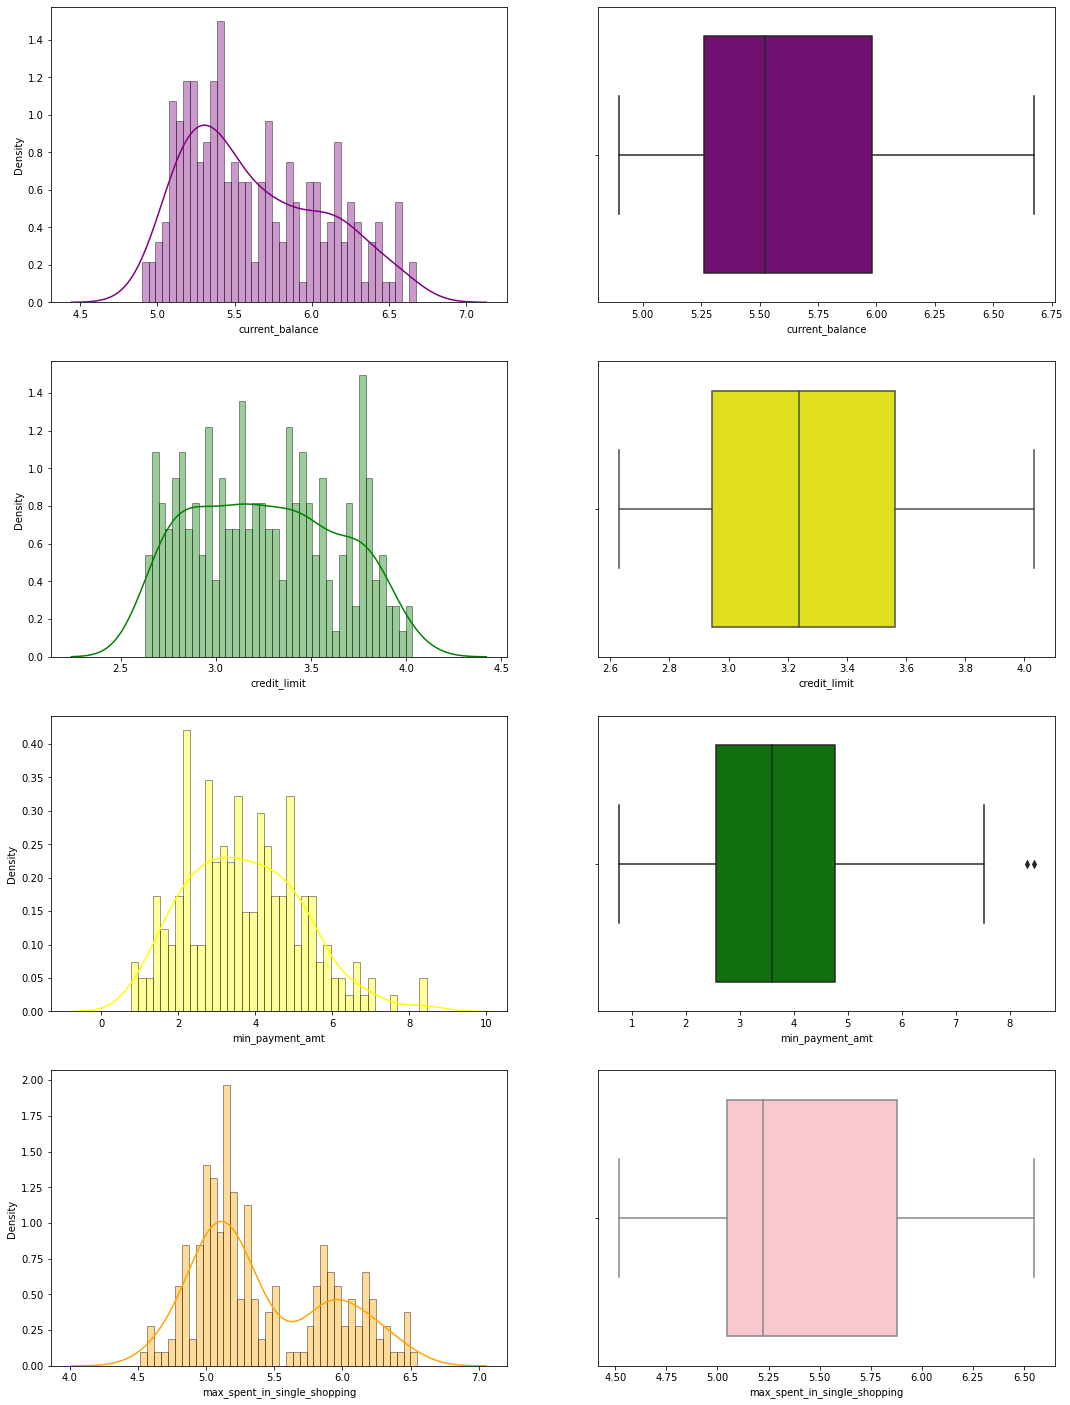

In [254]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (18,25))
sns.distplot(df['current_balance'], bins = 40, hist_kws= dict(ec = 'black'), ax= axs[0][0], color= 'purple');
sns.distplot(df['credit_limit'], bins = 40, hist_kws= dict(ec = 'black'), ax =axs[1][0], color= 'green');
sns.distplot(df['min_payment_amt'], bins = 40, hist_kws= dict(ec = 'black'), ax= axs[2][0], color = 'yellow');
sns.distplot(df['max_spent_in_single_shopping'], bins = 40, hist_kws= dict(ec ='black'), ax = axs[3][0], color= 'orange');

sns.boxplot(df['current_balance'], ax = axs[0][1], color= 'purple');
sns.boxplot(df['credit_limit'], ax = axs[1][1], color= 'yellow');
sns.boxplot(df['min_payment_amt'], ax = axs[2][1], color = 'green');
sns.boxplot(df['max_spent_in_single_shopping'], ax = axs[3][1], color='pink' );


### Checking pattern of the Data using pairplot

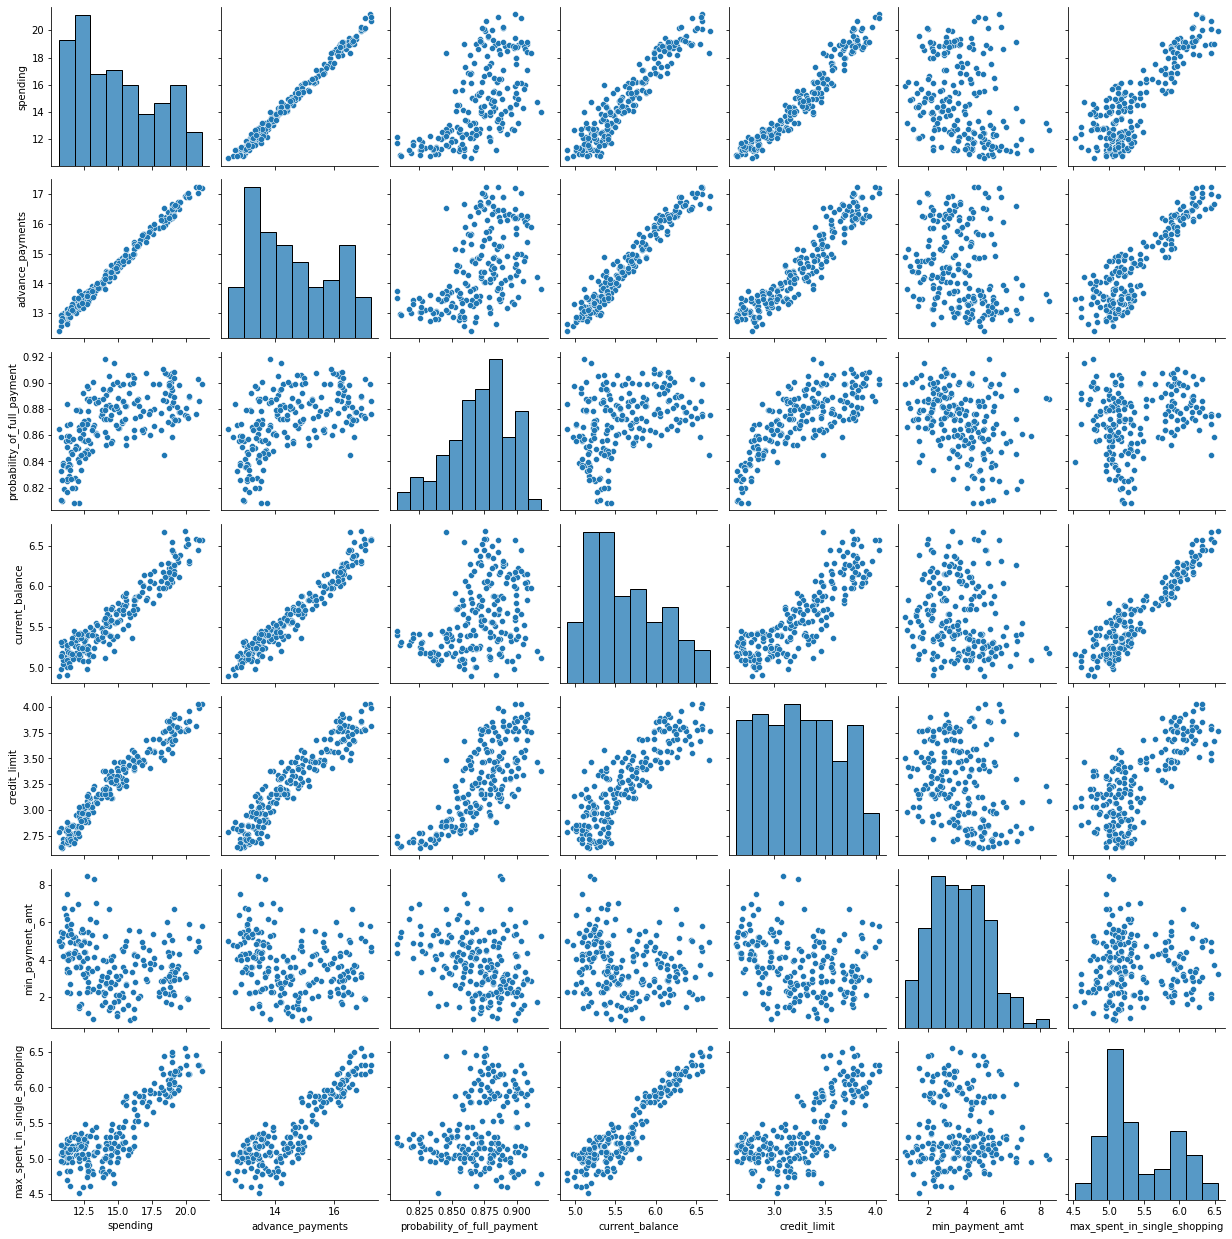

In [255]:
sns.pairplot(df)

### Checking Correlation between the Variables 

In [256]:
corr=df.corr()
corr

spending  advance_payments  \
spending                      1.000000          0.994341   
advance_payments              0.994341          1.000000   
probability_of_full_payment   0.608288          0.529244   
current_balance               0.949985          0.972422   
credit_limit                  0.970771          0.944829   
min_payment_amt              -0.229572         -0.217340   
max_spent_in_single_shopping  0.863693          0.890784   

                              probability_of_full_payment  current_balance  \
spending                                         0.608288         0.949985   
advance_payments                                 0.529244         0.972422   
probability_of_full_payment                      1.000000         0.367915   
current_balance                                  0.367915         1.000000   
credit_limit                                     0.761635         0.860415   
min_payment_amt                                 -0.331471        -0.171562   
max_spent_in_single_shopping                     0.226825         0.932806   

                              credit_limit  min_payment_amt  \
spending                          0.970771        -0.229572   
advance_payments                  0.944829        -0.217340   
probability_of_full_payment       0.761635        -0.331471   
current_balance                   0.860415        -0.171562   
credit_limit                      1.000000        -0.258037   
min_payment_amt                  -0.258037         1.000000   
max_spent_in_single_shopping      0.749131        -0.011079   

                              max_spent_in_single_shopping  
spending                                          0.863693  
advance_payments                                  0.890784  
probability_of_full_payment                       0.226825  
current_balance                                   0.932806  
credit_limit                                      0.749131  
min_payment_amt                                  -0.011079  
max_spent_in_single_shopping                      1.000000

#### Visualizing Correlation Using Heatmap

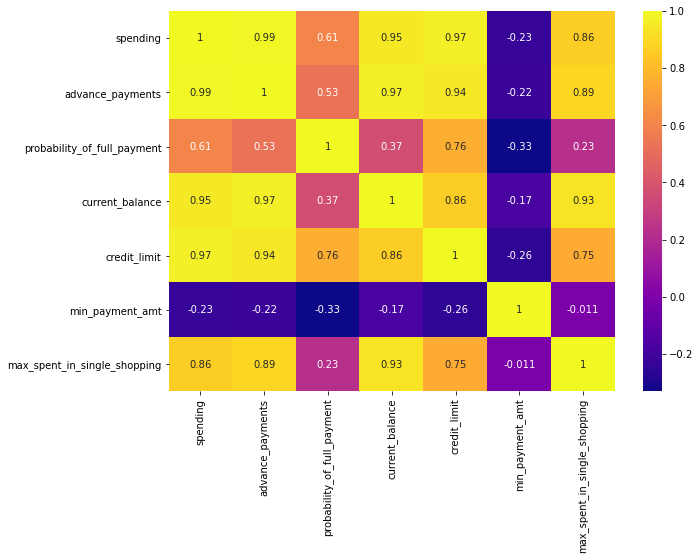

In [257]:
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cmap='plasma');

In [258]:
df_n = df[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']]

## Do you think scaling is necessary for clustering in this case? Justify

### Looking at the head of the Data

In [259]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

### Plotting the Variables and Checking the range  of the each Column

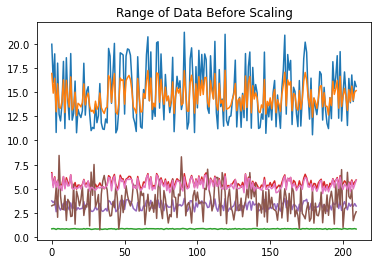

In [260]:
plt.title('Range of Data Before Scaling')
plt.plot(df);

<b> As we can see that from Head of the Data that Ranges are diffrent 

<b> advance_payments (in 100s) & current_balance (in 1000s),credit_limit (10000s) have diffrent range if we don't do the scaling  credit limit will take more weightage while modal building 
    
<b> So, Scaling is neccessary here 

### Scaling The Data

In [261]:
from sklearn.preprocessing import StandardScaler


In [262]:
#Initialize an object for StandardScaler
sc = StandardScaler()
#Scale the training data
df_n[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']] = sc.fit_transform(df_n[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']])

In [263]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

### Scaled Data

In [264]:
df_n.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0      1.338579        -0.298806                      2.328998  
1      0.858236        -0.242805                     -0.538582  
2      1.317348        -0.221471                      1.509107  
3     -1.639017         0.987884                     -0.454961  
4      1.155464        -1.088154                      0.874813

### Describing the Scaled Data

In [265]:
df_n.describe().round(6)

spending  advance_payments  probability_of_full_payment  \
count  210.000000        210.000000                   210.000000   
mean     0.000000          0.000000                     0.000000   
std      1.002389          1.002389                     1.002389   
min     -1.466714         -1.649686                    -2.668236   
25%     -0.887955         -0.851433                    -0.598079   
50%     -0.169674         -0.183664                     0.103993   
75%      0.846599          0.887069                     0.711677   
max      2.181534          2.065260                     2.006586   

       current_balance  credit_limit  min_payment_amt  \
count       210.000000    210.000000       210.000000   
mean         -0.000000     -0.000000         0.000000   
std           1.002389      1.002389         1.002389   
min          -1.650501     -1.668209        -1.956769   
25%          -0.828682     -0.834907        -0.759148   
50%          -0.237628     -0.057335        -0.067469   
75%           0.794595      0.804496         0.712379   
max           2.367533      2.055112         3.170590   

       max_spent_in_single_shopping  
count                    210.000000  
mean                      -0.000000  
std                        1.002389  
min                       -1.813288  
25%                       -0.740495  
50%                       -0.377459  
75%                        0.956394  
max                        2.328998

### Plotting the Dataset after Scaling

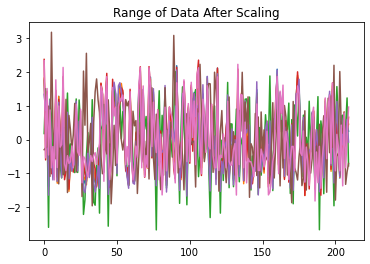

In [266]:
plt.title('Range of Data After Scaling')
plt.plot(df_n);

In [267]:
data = df_n

## Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [268]:
data.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0      1.338579        -0.298806                      2.328998  
1      0.858236        -0.242805                     -0.538582  
2      1.317348        -0.221471                      1.509107  
3     -1.639017         0.987884                     -0.454961  
4      1.155464        -1.088154                      0.874813

### Creating the Dendrogram
### Importing dendrogram and linkage module

In [276]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Choosing Ward linkage method

#### Ward Linkage:-

• Ward´s linkage  function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster.

• This is Similar to group average and centroid distance

•joins records and clusters together progressively to produce larger and larger clusters, but operates slightly differently from the general approach

In [277]:
wardlink = linkage(data, method = 'ward')

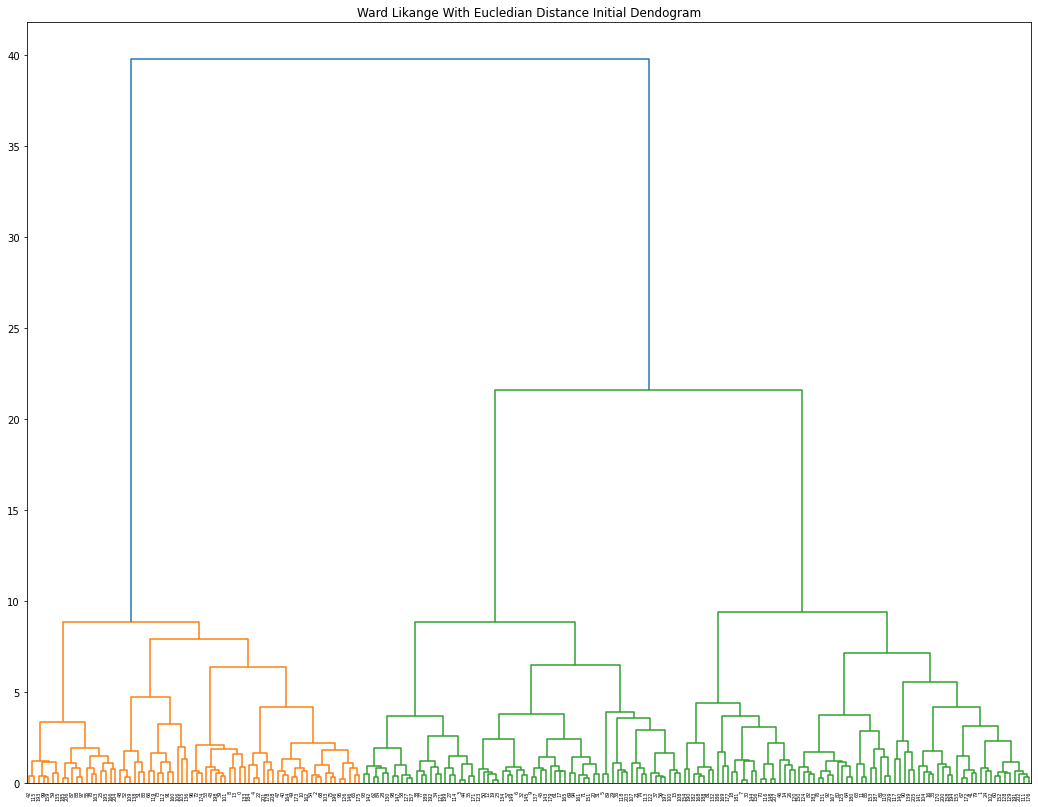

In [278]:

plt.figure(figsize=(18,14))
plt.title('Ward Likange With Eucledian Distance Initial Dendogram')
dend = dendrogram(wardlink)

#### Dendogram with Complete Linkage & Manhattan Distance

In [279]:
completelink = linkage(data, method = 'complete',metric= 'cityblock')

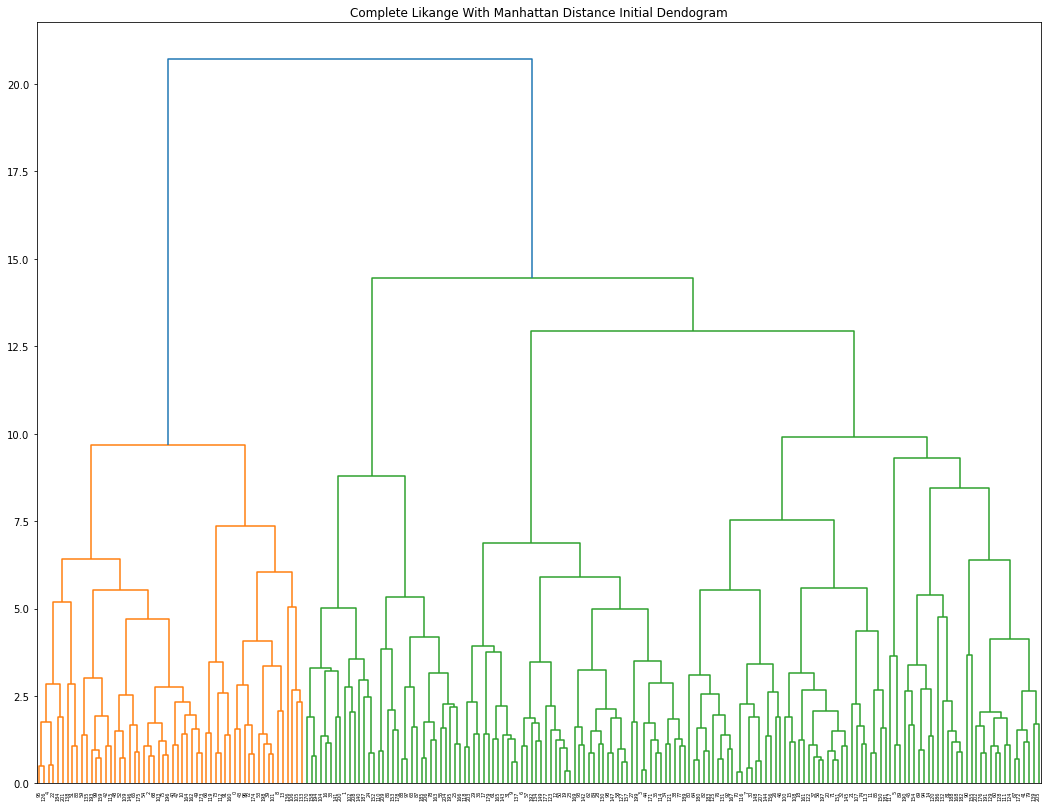

In [280]:

plt.figure(figsize=(18,14))
plt.title('Complete Likange With Manhattan Distance Initial Dendogram')
dend21 = dendrogram(completelink)

### Cutting the Dendrogram with suitable clusters

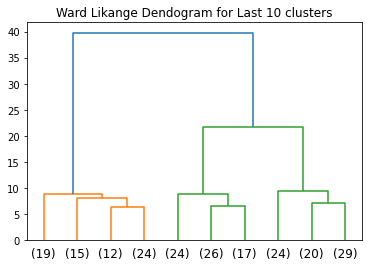

In [281]:
plt.title('Ward Likange Dendogram for Last 10 clusters')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

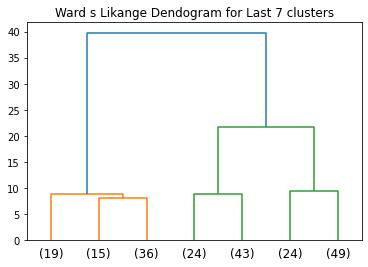

In [282]:
plt.title('Ward s Likange Dendogram for Last 7 clusters')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 7,
                 )

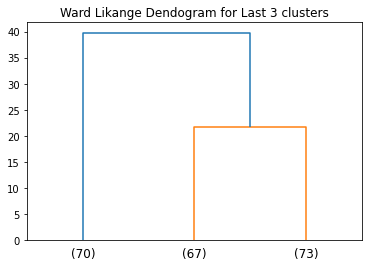

In [283]:
plt.title('Ward Likange Dendogram for Last 3 clusters')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 3,
                 )

### Importing fcluster module to create clusters

In [284]:
from scipy.cluster.hierarchy import fcluster

[1 3 1 2 1 2 2 3 1 2 1 3 2 1 3 2 3 2 3 2 2 2 1 2 3 1 3 2 2 2 3 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 3 3 1 1 3 1 2 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 3 3 1 1 2 3 1 3 2 2 1 1 1 2 1 2 1 3 1 3 1 1 2 2 1 3
 3 1 2 2 1 3 3 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 3 3 2 2 3 2 1 2
 3 2 3 2 3 3 3 3 3 2 3 1 1 2 1 1 1 2 1 3 3 3 3 2 3 1 1 1 3 3 1 2 3 3 3 3 1
 1 3 3 3 2 3 3 2 1 3 1 1 2 1 2 3 1 3 2 1 3 1 3 1 3]


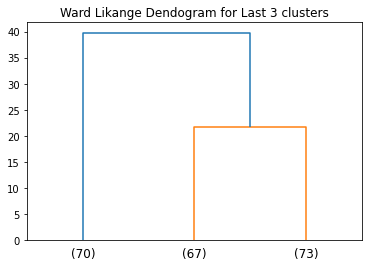

In [285]:
#Method 1

clusters = fcluster(wardlink,3 , criterion='maxclust')
print(clusters)
plt.title('Ward Likange Dendogram for Last 3 clusters')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 3,
                 )

[1 3 1 2 1 2 2 3 1 2 1 3 2 1 3 2 3 2 3 2 2 2 1 2 3 1 3 2 2 2 3 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 3 3 1 1 3 1 2 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 3 3 1 1 2 3 1 3 2 2 1 1 1 2 1 2 1 3 1 3 1 1 2 2 1 3
 3 1 2 2 1 3 3 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 3 3 2 2 3 2 1 2
 3 2 3 2 3 3 3 3 3 2 3 1 1 2 1 1 1 2 1 3 3 3 3 2 3 1 1 1 3 3 1 2 3 3 3 3 1
 1 3 3 3 2 3 3 2 1 3 1 1 2 1 2 3 1 3 2 1 3 1 3 1 3]


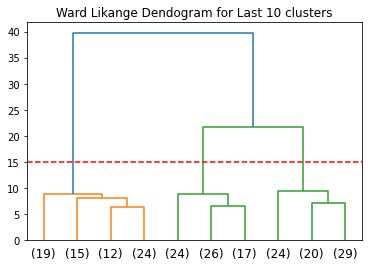

In [286]:
# Method 2

clusters2 = fcluster(wardlink, 15, criterion='distance')
print(clusters2)
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.title('Ward Likange Dendogram for Last 10 clusters')
#If we want just three clusters then we cut the dendogram at y=15 at distance based Cut 
plt.axhline(y = 15 , color = 'red', linestyle = '--');

In [287]:
np.array_equal(clusters,clusters2)

# We have achived Equalities in both Maxclust and distance based clust

True

### Appending clusters to original dataset

In [288]:
df['clusters'] = clusters

In [289]:
df

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                       0.8752            6.675   
1       15.99             14.89                       0.9064            5.363   
2       18.95             16.42                       0.8829            6.248   
3       10.83             12.96                       0.8099            5.278   
4       17.99             15.86                       0.8992            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                       0.8880            5.439   
206     16.77             15.62                       0.8638            5.927   
207     14.03             14.16                       0.8796            5.438   
208     16.12             15.00                       0.9000            5.709   
209     15.57             15.15                       0.8527            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  clusters  
0           3.763            3.252                         6.550         1  
1           3.582            3.336                         5.144         3  
2           3.755            3.368                         6.148         1  
3           2.641            5.182                         5.185         2  
4           3.694            2.068                         5.837         1  
..            ...              ...                           ...       ...  
205         3.199            3.986                         4.738         3  
206         3.438            4.920                         5.795         1  
207         3.201            1.717                         5.001         3  
208         3.485            2.270                         5.443         1  
209         3.231            2.640                         5.879         3  

[210 rows x 8 columns]

### Cluster Frequency

In [291]:
df.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

### Cluster Profiles WARD LINKAGE

In [292]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata.T

clusters                              1          2          3
spending                      18.371429  11.872388  14.199041
advance_payments              16.145429  13.257015  14.233562
probability_of_full_payment    0.884400   0.848072   0.879190
current_balance                6.158171   5.238940   5.478233
credit_limit                   3.684629   2.848537   3.226452
min_payment_amt                3.639157   4.949433   2.612181
max_spent_in_single_shopping   6.017371   5.122209   5.086178
Freq                          70.000000  67.000000  73.000000

### Visulization of clusters

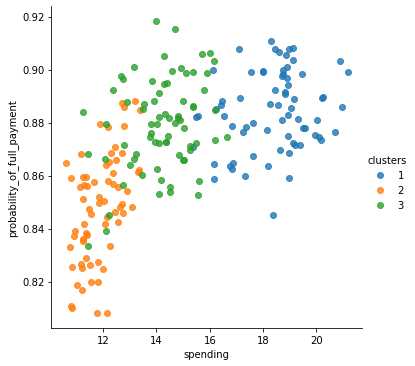

In [293]:
sns.lmplot(x='spending',y='probability_of_full_payment',data=df,hue='clusters',fit_reg=False)

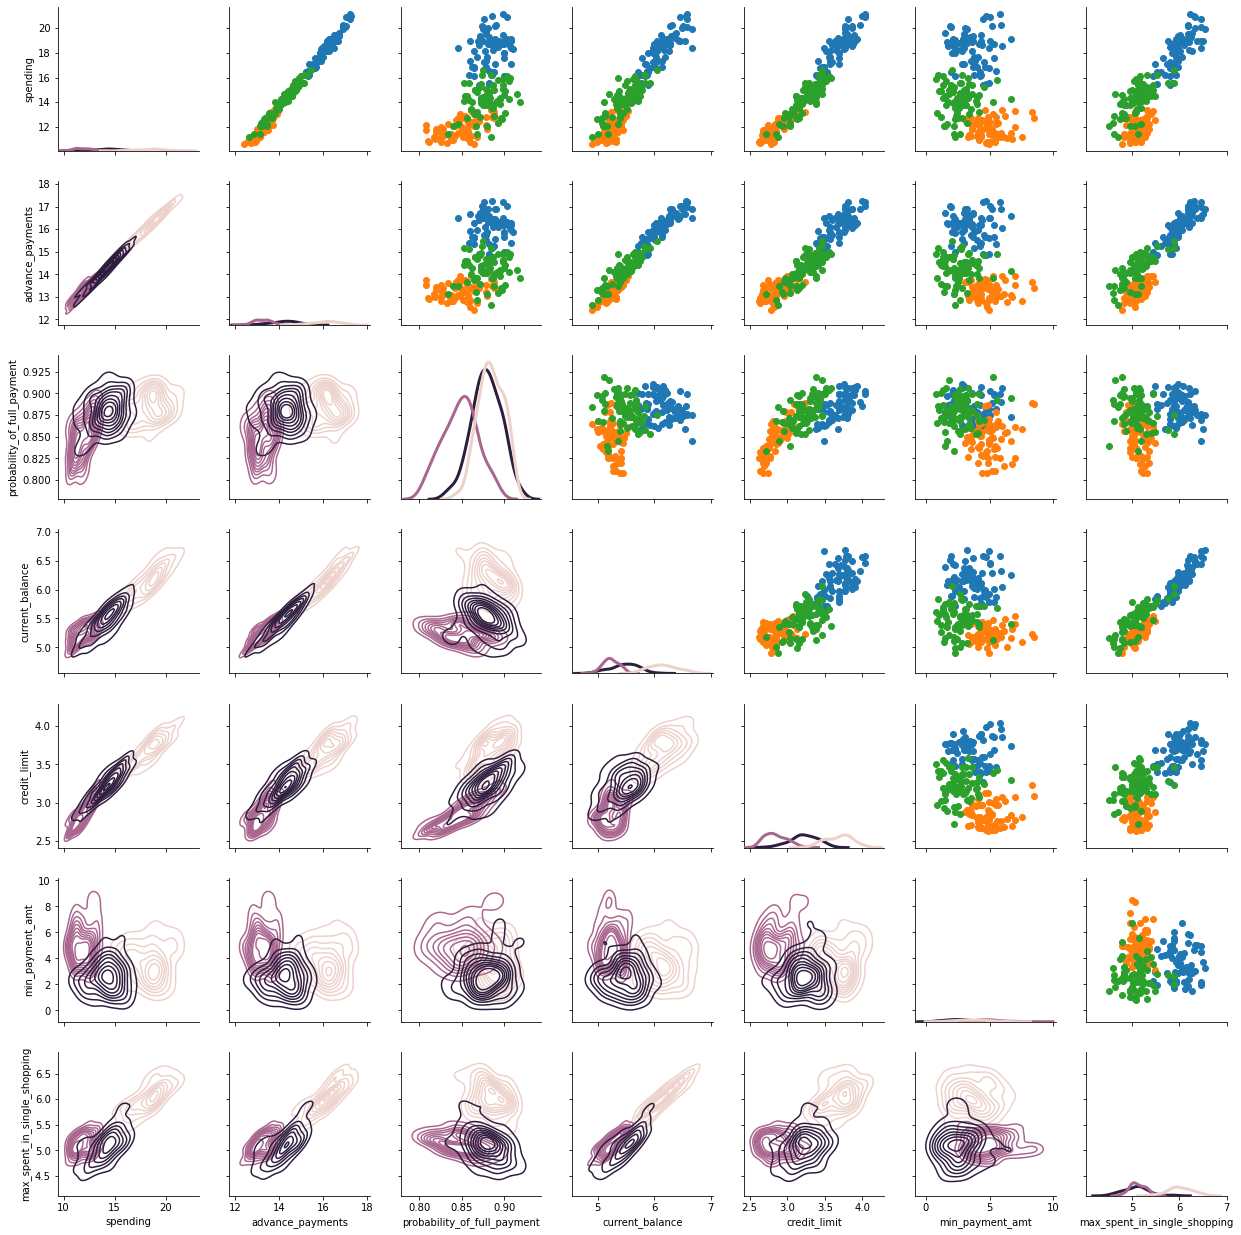

In [299]:
g = sns.PairGrid(df,hue='clusters')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

### Cutting the Dendrogram with suitable clusters

#### Average Linkage:-

• Average Linkage is a type of hierarchical clustering in which the distance between one cluster and another cluster is considered to be equal to the average distance from any member of one cluster to any member of the other cluster

In [128]:
avglink = linkage(data, method = 'average')

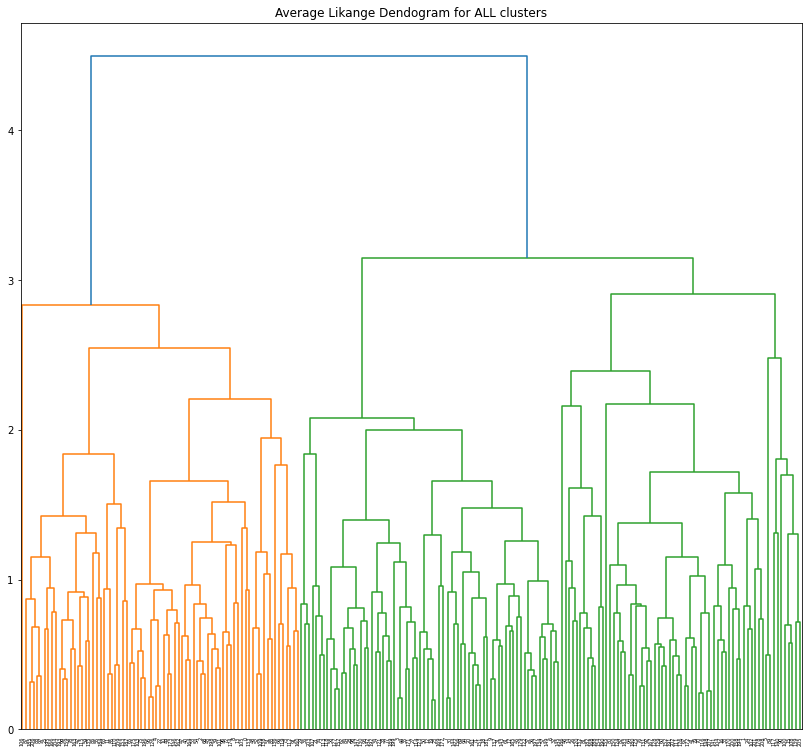

In [129]:
plt.figure(figsize=(14,13))
plt.title('Average Likange Dendogram for ALL clusters')
avgdend = dendrogram(avglink)

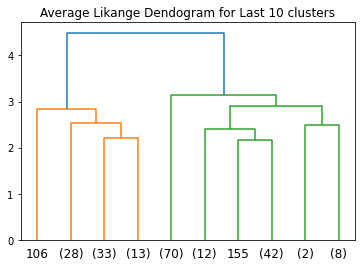

In [130]:
plt.title('Average Likange Dendogram for Last 10 clusters')
avgdend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 10,
                 )

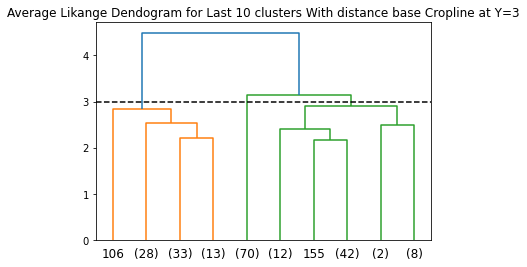

In [131]:
plt.title('Average Likange Dendogram for Last 10 clusters With distance base Cropline at Y=3')
avgdend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.axhline(y = 3, color = 'black', linestyle = '--');

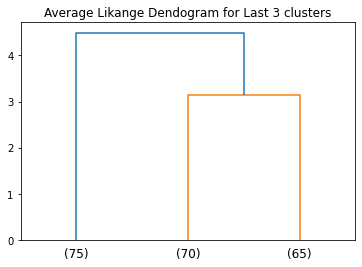

In [132]:
plt.title('Average Likange Dendogram for Last 3 clusters')
avgdend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 3,
                 )

### Using Fcluster Module for Average Linakge

[1 3 1 2 1 3 2 2 1 2 1 1 2 1 3 3 3 2 2 2 2 2 1 2 3 1 3 2 2 2 2 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 1 3 1 1 3 1 2 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 1 1 1 1 3 3 1 3 2 2 1 1 1 2 1 3 1 3 1 3 1 1 2 3 1 1
 3 1 2 2 1 3 3 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 3 3 2 2 2 2 1 2
 3 2 3 2 3 1 3 3 2 2 3 1 1 2 1 1 1 2 1 3 3 2 3 2 3 1 1 1 3 2 3 2 3 2 3 3 1
 1 3 1 3 2 3 3 2 1 3 1 1 2 1 2 3 3 3 2 1 3 1 3 3 1]


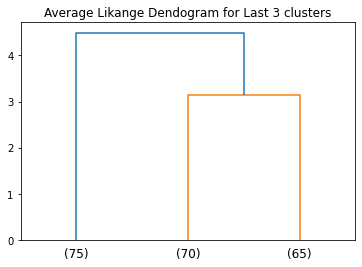

In [133]:
#Method 1

clusters = fcluster(avglink,3 , criterion='maxclust')
print(clusters)
plt.title('Average Likange Dendogram for Last 3 clusters')
avgdend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 3,
                 )

[1 3 1 2 1 3 2 2 1 2 1 1 2 1 3 3 3 2 2 2 2 2 1 2 3 1 3 2 2 2 2 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 1 3 1 1 3 1 2 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 1 1 1 1 3 3 1 3 2 2 1 1 1 2 1 3 1 3 1 3 1 1 2 3 1 1
 3 1 2 2 1 3 3 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 3 3 2 2 2 2 1 2
 3 2 3 2 3 1 3 3 2 2 3 1 1 2 1 1 1 2 1 3 3 2 3 2 3 1 1 1 3 2 3 2 3 2 3 3 1
 1 3 1 3 2 3 3 2 1 3 1 1 2 1 2 3 3 3 2 1 3 1 3 3 1]


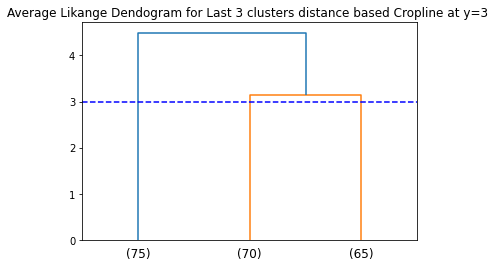

In [134]:
# Method 2

clusters2 = fcluster(avglink, 3, criterion='distance')
print(clusters2)
plt.title('Average Likange Dendogram for Last 3 clusters distance based Cropline at y=3 ')
avgdend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 3,
                 )
plt.axhline(y = 3 , color = 'blue', linestyle = '--');

In [135]:
np.array_equal(clusters,clusters2)

# We have achived Equalities in both Maxclust and distance based clust

True

### Appending clusters to original dataset

In [136]:
df= df.drop('clusters',axis=1)

In [137]:
df['Avglink_clusters'] = clusters

In [138]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0         3.763            3.252                         6.550   
1         3.582            3.336                         5.144   
2         3.755            3.368                         6.148   
3         2.641            5.182                         5.185   
4         3.694            2.068                         5.837   

   Avglink_clusters  
0                 1  
1                 3  
2                 1  
3                 2  
4                 1

### Cluster Frequency

In [139]:
df.Avglink_clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: Avglink_clusters, dtype: int64

### Cluster Profiles with AVEREGE LINKAGE

In [140]:
aggdata_avglink=df.groupby('Avglink_clusters').mean()
aggdata_avglink['Freq']=df.Avglink_clusters.value_counts().sort_index()
aggdata_avglink.T

Avglink_clusters                      1          2          3
spending                      18.129200  11.916857  14.217077
advance_payments              16.058000  13.291000  14.195846
probability_of_full_payment    0.881595   0.846766   0.884869
current_balance                6.135747   5.258300   5.442000
credit_limit                   3.648120   2.846000   3.253508
min_payment_amt                3.650200   4.619000   2.768418
max_spent_in_single_shopping   5.987040   5.115071   5.055569
Freq                          75.000000  70.000000  65.000000

### Using Agglomerative Clustering

In [141]:
agg_data =df_n
agg_data.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0      1.338579        -0.298806                      2.328998  
1      0.858236        -0.242805                     -0.538582  
2      1.317348        -0.221471                      1.509107  
3     -1.639017         0.987884                     -0.454961  
4      1.155464        -1.088154                      0.874813

In [142]:
from sklearn.cluster import AgglomerativeClustering

In [143]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(agg_data)
print(Cluster_agglo)

[1 0 1 2 1 0 2 2 1 2 1 1 2 1 0 0 0 2 2 2 2 2 1 2 0 1 0 2 2 2 2 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 1 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 1 1 1 1 0 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 1
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 2 2 1 2
 0 2 0 2 0 1 0 0 2 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 2 0 0 1
 1 0 1 0 2 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 1]


In [144]:
df= df.drop('Avglink_clusters',axis=1)

In [216]:
df["Agglo_CLusters"]=Cluster_agglo

In [217]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  Agglo_CLusters  
0         3.763            3.252                         6.550               1  
1         3.582            3.336                         5.144               0  
2         3.755            3.368                         6.148               1  
3         2.641            5.182                         5.185               2  
4         3.694            2.068                         5.837               1

In [218]:
agglo_data=df.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data.T

Agglo_CLusters                        0          1          2
spending                      14.217077  18.129200  11.916857
advance_payments              14.195846  16.058000  13.291000
probability_of_full_payment    0.884869   0.881595   0.846766
current_balance                5.442000   6.135747   5.258300
credit_limit                   3.253508   3.648120   2.846000
min_payment_amt                2.768418   3.650200   4.619000
max_spent_in_single_shopping   5.055569   5.987040   5.115071
Freq                          65.000000  75.000000  70.000000

### Visualizing Agglomerative  Clusters using pairplot

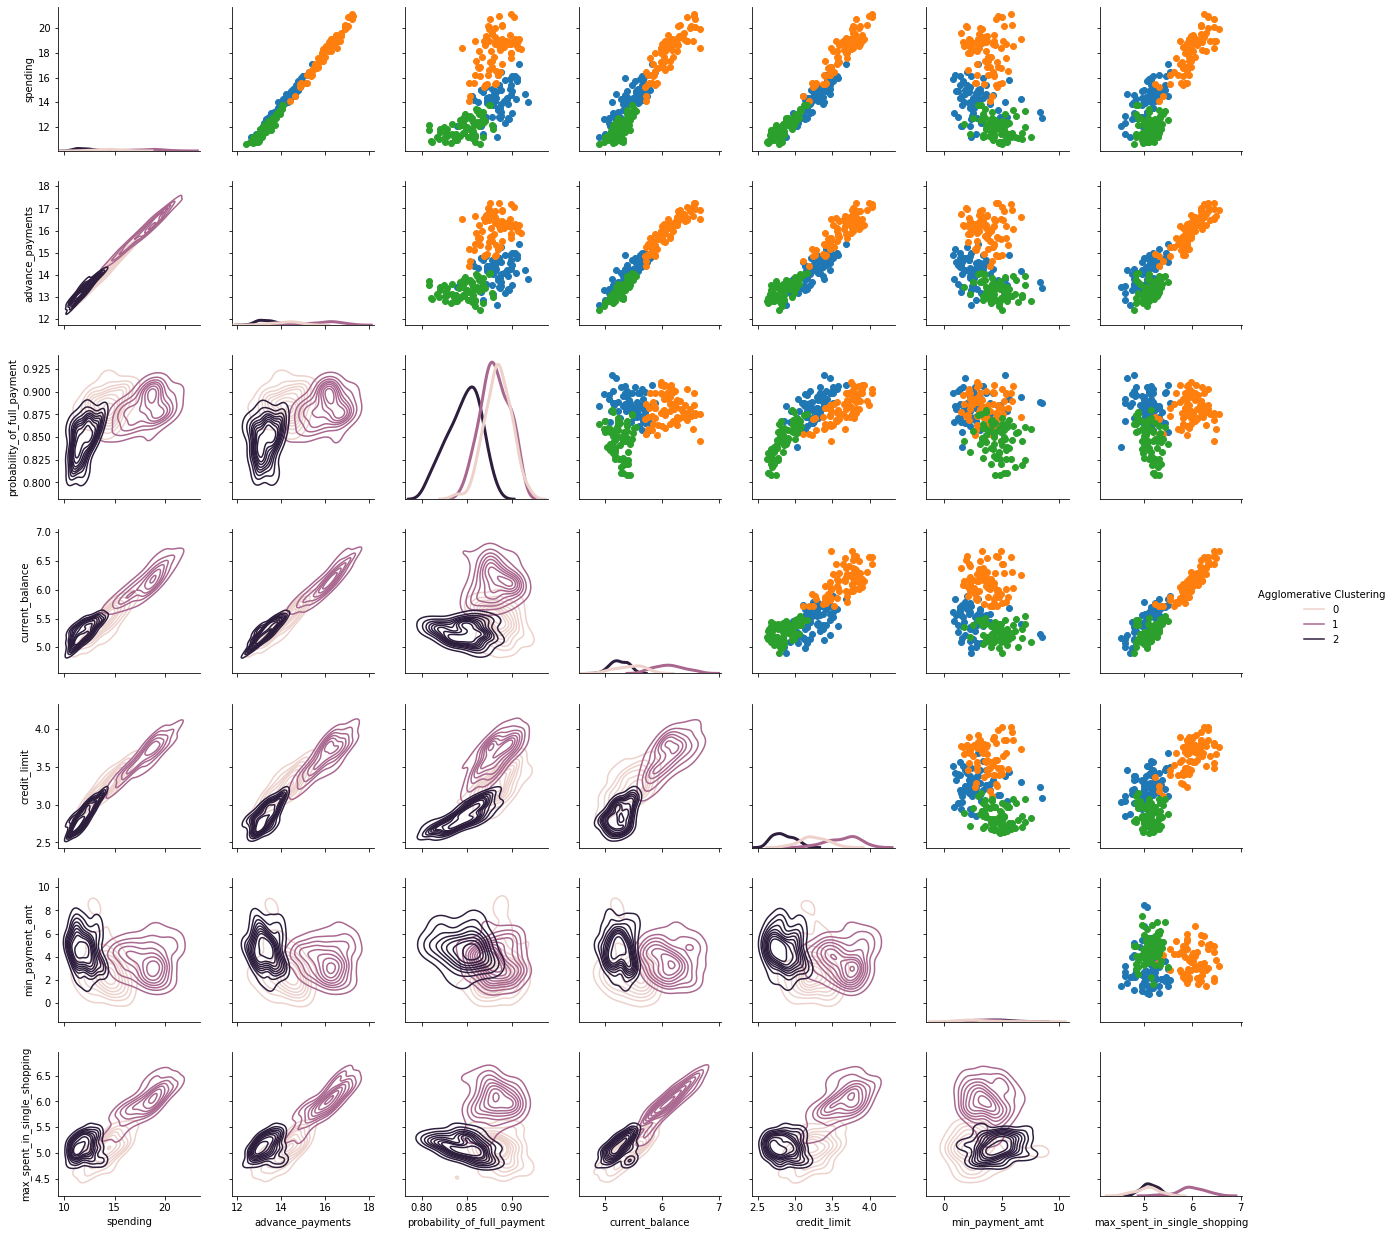

In [148]:
g = sns.PairGrid(df,hue='Agglo_CLusters')
g = g.map_upper(plt.scatter)

g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=True)
g.add_legend(title="Agglomerative Clustering", adjust_subtitles=True)

## Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [187]:
from sklearn.cluster import KMeans 

In [188]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

In [219]:
# Create K Means cluster and store the result in the object k_means 
k_means = KMeans(n_clusters = 4,random_state=1)

# Looking at previously created dendograms we observed N clusters =3  

In [220]:
# Fit K means on the scaled_df
k_means.fit(df_n)

KMeans(n_clusters=4, random_state=1)

In [221]:
# Get the labels
k_means.labels_

array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3,
       2, 1, 3, 0, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2])

In [222]:
data_df = df.drop('Agglo_CLusters',axis =1)
data_df["Clus_kmeans4"] = k_means.labels_
data_df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  Clus_kmeans4  
0         3.763            3.252                         6.550             3  
1         3.582            3.336                         5.144             1  
2         3.755            3.368                         6.148             3  
3         2.641            5.182                         5.185             0  
4         3.694            2.068                         5.837             3

In [223]:
data_df.Clus_kmeans4.value_counts().sort_index()

0    65
1    66
2    30
3    49
Name: Clus_kmeans4, dtype: int64

In [225]:
clust_profile=data_df.copy()
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile.T

Clus_kmeans4                          0          1          2          3
spending                      11.816462  13.992576  16.317333  19.120000
advance_payments              13.242154  14.114697  15.288000  16.459184
probability_of_full_payment    0.846060   0.881241   0.876877   0.886686
current_balance                5.237600   5.431939   5.864800   6.267265
credit_limit                   2.834354   3.213318   3.444433   3.768612
min_payment_amt                4.919415   2.591624   3.868567   3.472980
max_spent_in_single_shopping   5.121846   5.030470   5.686533   6.125878
freq                          65.000000  66.000000  30.000000  49.000000

### Silhouette Score Calculation

In [193]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [194]:
wss =[] 


In [195]:
for i in range(1,8):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_n)
    wss.append(KM.inertia_)
    

In [196]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267]

In [197]:
for i in range(0,7):
    
    print("The wss Score for", i+1, "clusters is ",wss[i])


The wss Score for 1 clusters is  1469.9999999999998
The wss Score for 2 clusters is  659.171754487041
The wss Score for 3 clusters is  430.6589731513006
The wss Score for 4 clusters is  371.38509060801096
The wss Score for 5 clusters is  327.21278165661346
The wss Score for 6 clusters is  289.31599538959495
The wss Score for 7 clusters is  262.98186570162267


In [198]:
a=[1,2,3,4,5,6,7]

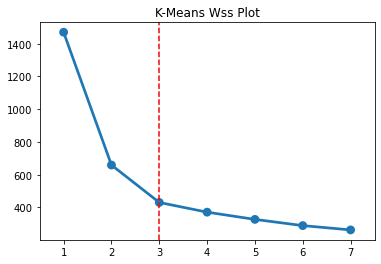

In [244]:
plt.title('K-Means Wss Plot')
sns.pointplot(a, wss);
plt.axvline(x = 2 , linestyle = '--', color = 'red')

<b> Looking at the Scree plot/wss Plot we found that an elbow at ncluster =2 but 2 Clusters doesn't make sense so We will take 2nd elbow at ncluster =3 and we can  cluster the dataset into low medium and High Spenders group 

In [200]:
ss={1:0}
for i in range(2, 20):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
 q=clusterer.fit_predict(df_n)
 s =silhouette_score(df_n,q)
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,
5)))


The Average Silhouette Score for 2 clusters is 0.46577
The Average Silhouette Score for 3 clusters is 0.40073
The Average Silhouette Score for 4 clusters is 0.32765
The Average Silhouette Score for 5 clusters is 0.28273
The Average Silhouette Score for 6 clusters is 0.2886
The Average Silhouette Score for 7 clusters is 0.28191
The Average Silhouette Score for 8 clusters is 0.26644
The Average Silhouette Score for 9 clusters is 0.25831
The Average Silhouette Score for 10 clusters is 0.2523
The Average Silhouette Score for 11 clusters is 0.25405
The Average Silhouette Score for 12 clusters is 0.24829
The Average Silhouette Score for 13 clusters is 0.2466
The Average Silhouette Score for 14 clusters is 0.23806
The Average Silhouette Score for 15 clusters is 0.24353
The Average Silhouette Score for 16 clusters is 0.26373
The Average Silhouette Score for 17 clusters is 0.25098
The Average Silhouette Score for 18 clusters is 0.24762
The Average Silhouette Score for 19 clusters is 0.24824


In [201]:
ss1 = []
s_range = range(2, 11)

for i in s_range:
    Km = KMeans(n_clusters=i, random_state=1)
    Km.fit(df_n)
    ss1.append(metrics.silhouette_score(df_n, Km.labels_))
    
ss1

[0.46577247686580914,
 0.4007270552751299,
 0.3276547677266193,
 0.2827335237380384,
 0.28859801403258994,
 0.2819058746607507,
 0.26644334449887014,
 0.2583120167794957,
 0.2523041928840054]

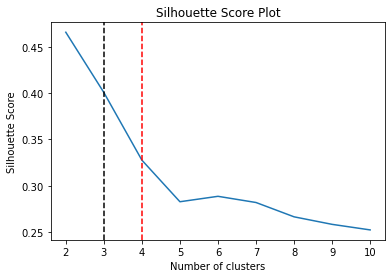

In [241]:
plt.plot(s_range,ss1)
plt.title('Silhouette Score Plot')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x = 3 , linestyle = '--', color = 'black')
plt.axvline(x = 4 , linestyle = '--', color = 'red')
plt.show()

In [203]:
ss[3] # Extracting Silhouette Score for nclusters =3 

0.40073

### As Silhouette Score plot suggest that Optimum No. of Clusters will be N= 3  or N=4 so we are trying to get cluater on nclusters =3 

In [227]:
k_means = KMeans(n_clusters = 3,random_state=1)

In [228]:
k_means.fit(df_n)

KMeans(n_clusters=3, random_state=1)

In [229]:
# Get the labels
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [230]:
data_df = data_df.drop('Clus_kmeans4',axis =1)

In [231]:

data_df["Clus_kmeans3"] = k_means.labels_
data_df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  Clus_kmeans3  
0         3.763            3.252                         6.550             2  
1         3.582            3.336                         5.144             0  
2         3.755            3.368                         6.148             2  
3         2.641            5.182                         5.185             1  
4         3.694            2.068                         5.837             2

In [232]:
data_df.Clus_kmeans3.value_counts().sort_index()

0    71
1    72
2    67
Name: Clus_kmeans3, dtype: int64

In [233]:
clust_profile=data_df.copy()
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=data_df.Clus_kmeans3.value_counts().sort_index()
clust_profile.T

Clus_kmeans3                          0          1          2
spending                      14.437887  11.856944  18.495373
advance_payments              14.337746  13.247778  16.203433
probability_of_full_payment    0.881597   0.848253   0.884210
current_balance                5.514577   5.231750   6.175687
credit_limit                   3.259225   2.849542   3.697537
min_payment_amt                2.707341   4.742389   3.632373
max_spent_in_single_shopping   5.120803   5.101722   6.041701
freq                          71.000000  72.000000  67.000000

### Kmeans Clusters Visualization

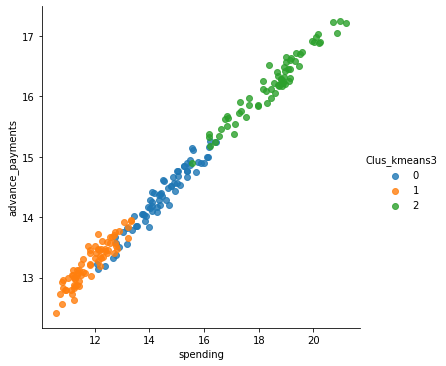

In [234]:
sns.lmplot(data=data_df, x='spending', y='advance_payments', hue='Clus_kmeans3',fit_reg=False, legend=True, legend_out=True)

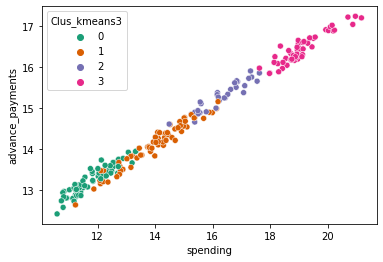

In [83]:
sns.scatterplot(data=data_df, x='spending', y='advance_payments', hue='Clus_kmeans3', legend=True,palette='Dark2')

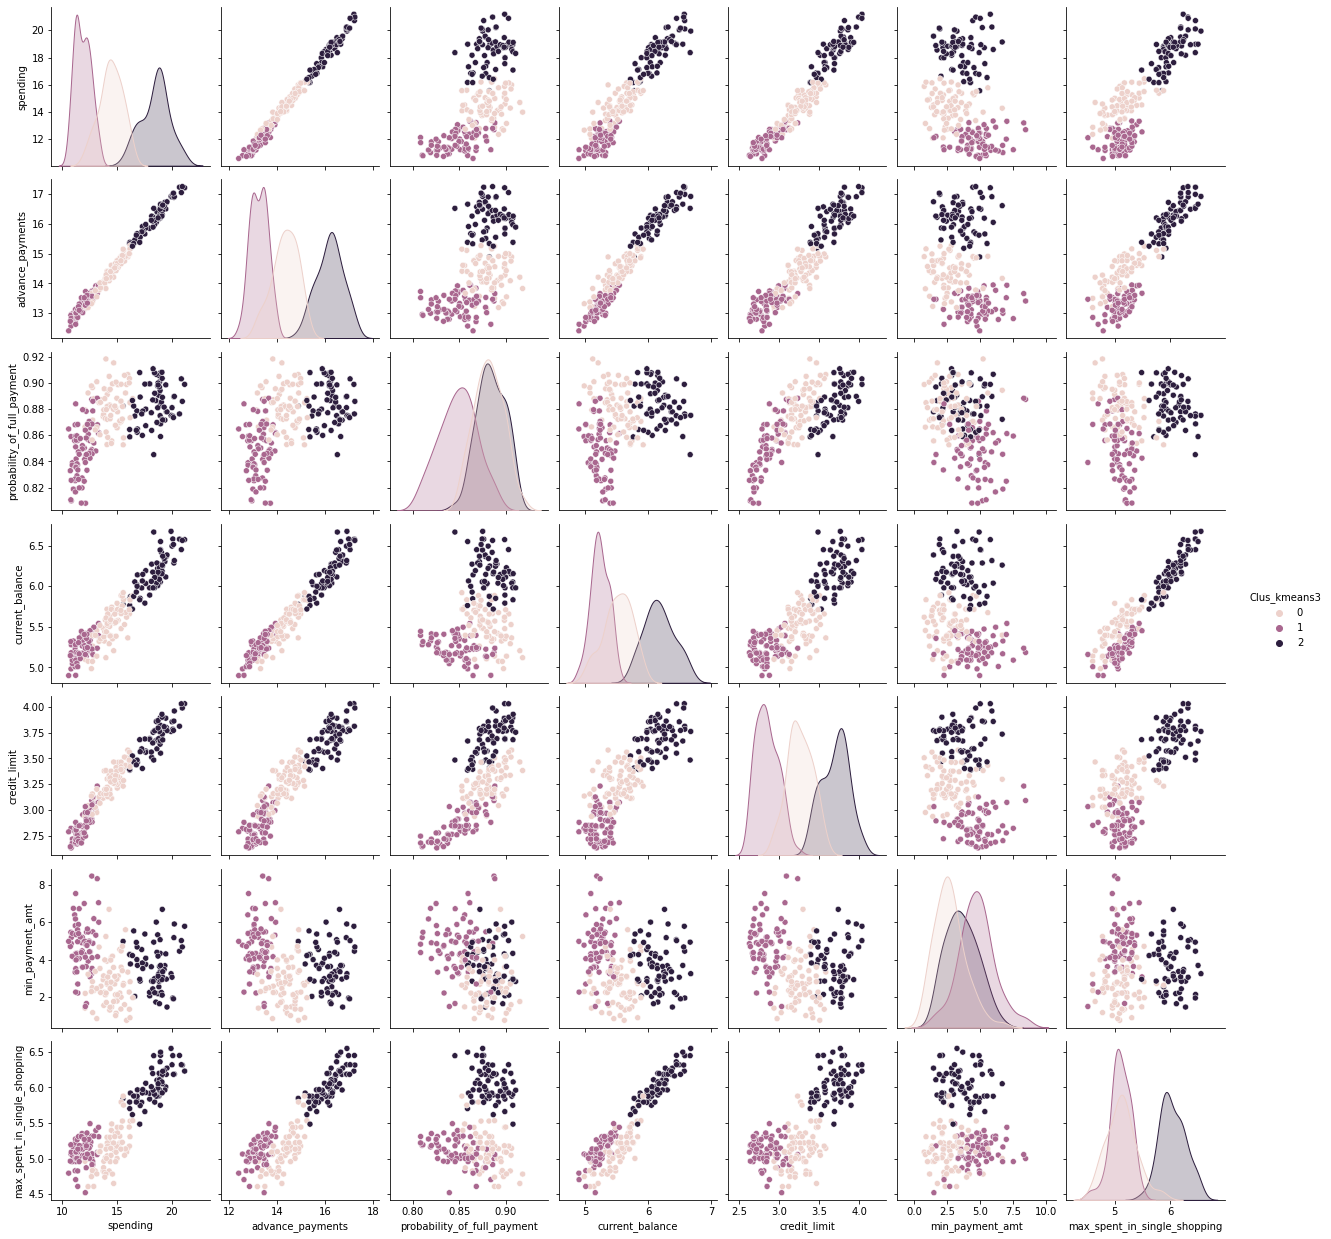

In [236]:
sns.pairplot(data_df,hue= 'Clus_kmeans3',hue_order =[])

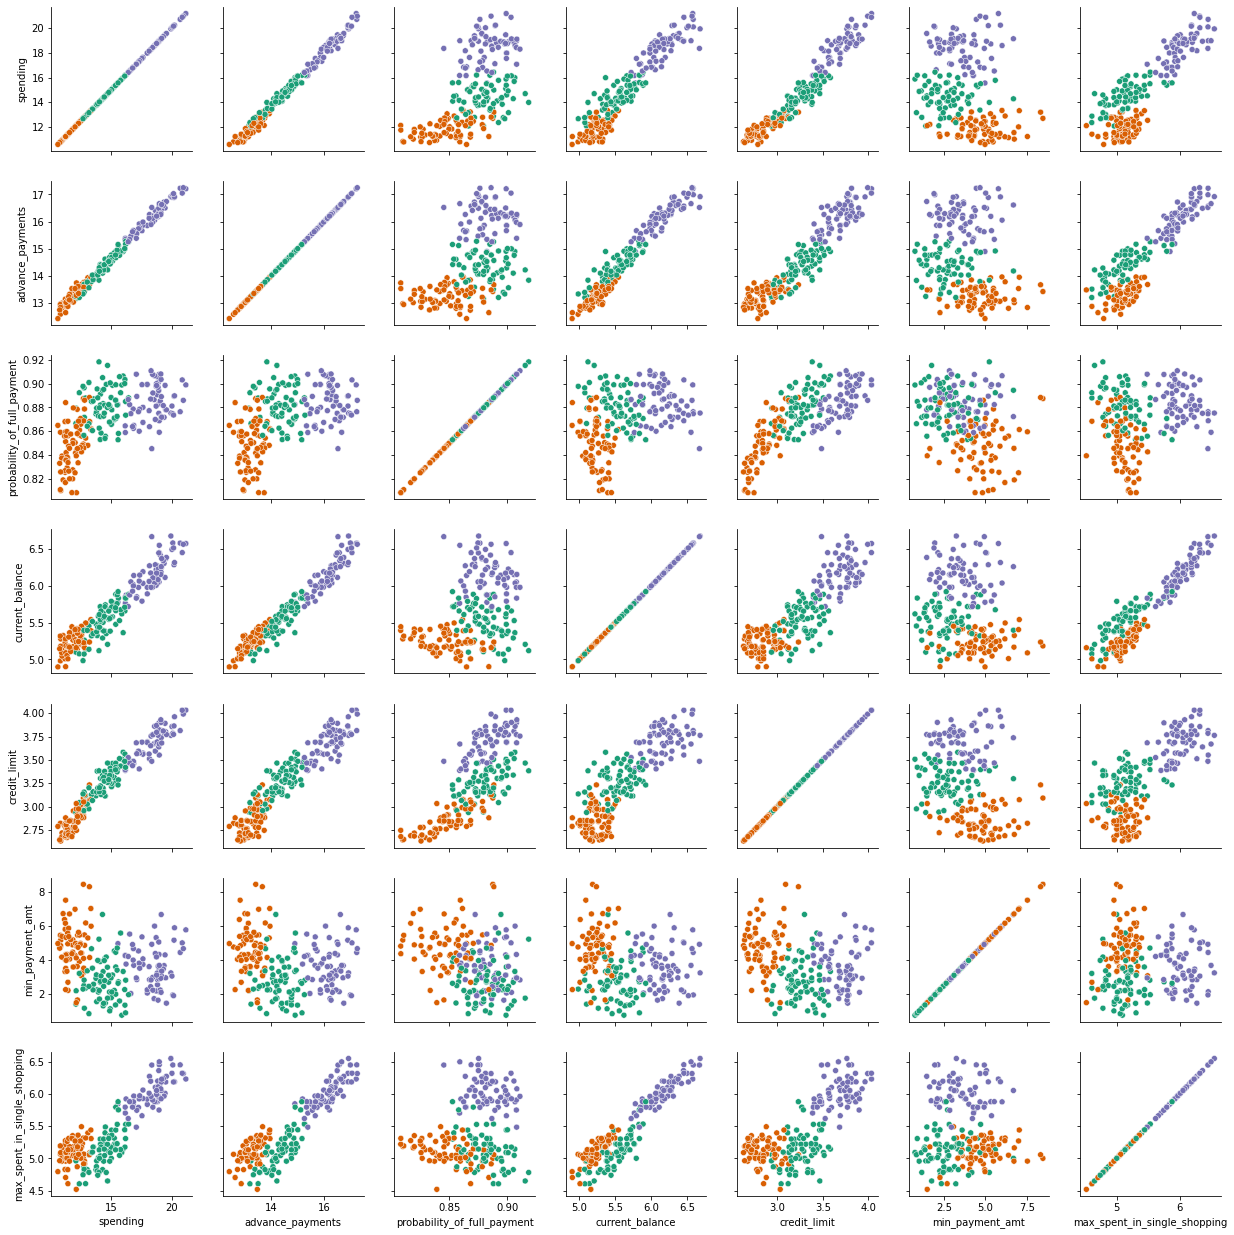

In [237]:
g = sns.PairGrid(data_df,hue= 'Clus_kmeans3',palette='Dark2')
g.map(sns.scatterplot)

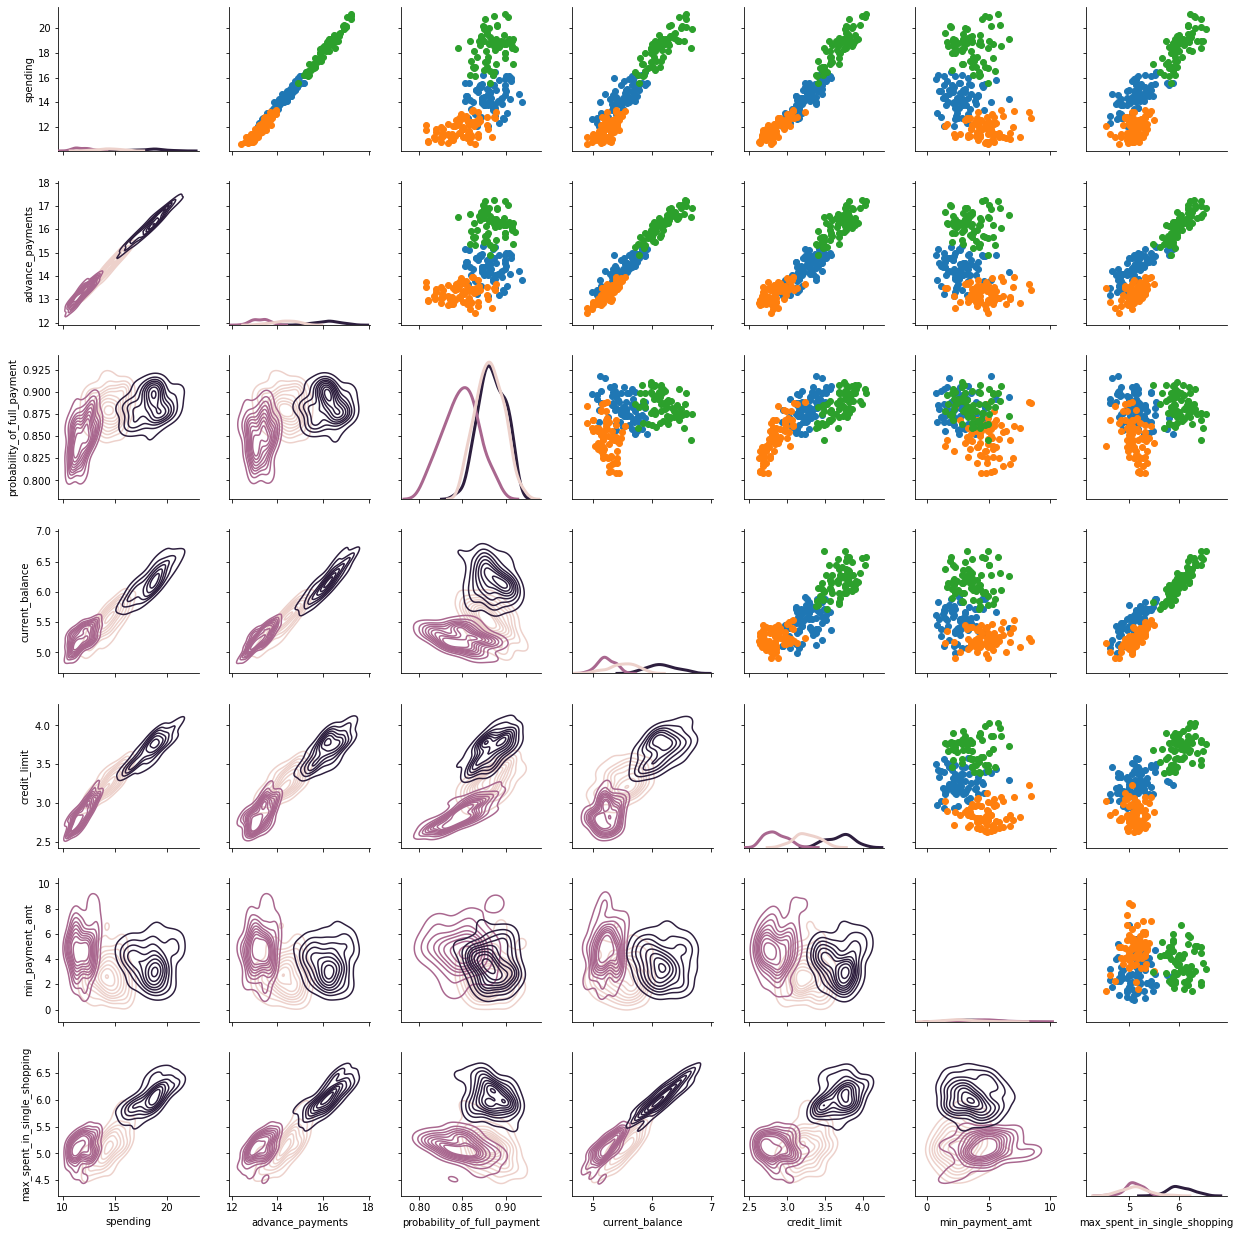

In [238]:
g = sns.PairGrid(data_df,hue='Clus_kmeans3')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=True)

## Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

### Cluster Profile using Higherical Clustering

In [87]:
aggdata.T

clusters                              1          2          3
spending                      18.371429  11.872388  14.199041
advance_payments              16.145429  13.257015  14.233562
probability_of_full_payment    0.884400   0.848072   0.879190
current_balance                6.158171   5.238940   5.478233
credit_limit                   3.684629   2.848537   3.226452
min_payment_amt                3.639157   4.949433   2.612181
max_spent_in_single_shopping   6.017371   5.122209   5.086178
Freq                          70.000000  67.000000  73.000000

### Cluster Profile using Higherical Agglomerative Clustering

In [88]:
agglo_data.T

Agglo_CLusters                        0          1          2
spending                      14.217077  18.129200  11.916857
advance_payments              14.195846  16.058000  13.291000
probability_of_full_payment    0.884869   0.881595   0.846766
current_balance                5.442000   6.135747   5.258300
credit_limit                   3.253508   3.648120   2.846000
min_payment_amt                2.768418   3.650200   4.619000
max_spent_in_single_shopping   5.055569   5.987040   5.115071
Freq                          65.000000  75.000000  70.000000

### Cluster Profile of  Kmeans  Clustering

In [89]:
clust_profile.T

Clus_kmeans3                          0          1          2          3
spending                      11.816462  13.992576  16.317333  19.120000
advance_payments              13.242154  14.114697  15.288000  16.459184
probability_of_full_payment    0.846060   0.881241   0.876877   0.886686
current_balance                5.237600   5.431939   5.864800   6.267265
credit_limit                   2.834354   3.213318   3.444433   3.768612
min_payment_amt                4.919415   2.591624   3.868567   3.472980
max_spent_in_single_shopping   5.121846   5.030470   5.686533   6.125878
freq                          65.000000  66.000000  30.000000  49.000000